In [1]:
!pip install vinzy_imgdata_importer

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from vinzy_imgdata_importer import img_data_importer
x,y,m = img_data_importer("C:/Users/SCIENCE/Downloads/house.jpg/seg_train")

Do you want to convert your image data to grey scale? y/n: n
Do you want to resize your data? y/n [default:100x100]: n
Generating, Shuffling & Mapping the Data...
Do you want to normalize your data? y/n [recommended]: y
Do you want to save your data? y/n [will be saved using pickle]: n


In [5]:
m

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

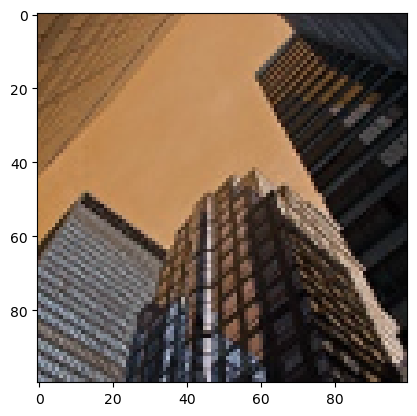

In [13]:
import matplotlib.pyplot as plt
index=1
plt.imshow(x[700])

In [8]:
len(x)

14034

In [10]:
len(m)

6

In [12]:
len(y)

14034

KeyError: 0

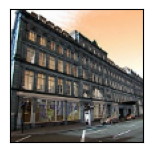

In [29]:
xs= x/255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i], cmap=plt.cm.binary)
    plt.xlabel(m[y[i]])
plt.show()

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from skimage.transform import resize

In [19]:
input_dir = x                                                    
categor= m                                                                                       

data=[]
labels=[]
for category_idx, category in enumerate(categor):
    for file in os.listdir(os.path.join(input_dir, category)):
        imd_path=os.path.join(input_dir, category, file)
        print(imd_path)
        imd=imread(imd_path)
        imd=resize(imd, (15,15))
        data.append(imd.flatten())
        labels.append(category_idx)

TypeError: expected str, bytes or os.PathLike object, not ndarray

In [34]:
x.shppe

AttributeError: 'numpy.ndarray' object has no attribute 'shppe'

In [33]:
imd_resize = resize(x, (15,15))
imd_resize 

ValueError: output_shape length cannot be smaller than the image number of dimensions

In [31]:

flatten_imd=imd_resize.flatten()
flatten_imd

ValueError: output_shape length cannot be smaller than the image number of dimensions

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

p=x
q=m
p_train,q_train,p_test,q_test=train_test_split(p,q,test_size=30)

sc = StandardScaler()
p_train = sc.fit_transform(p_train)
p_test = sc.transform(p_test)
sv=SVC()
sv.fit(p_train, q_train)
pred=predict(p_test)
pred

ValueError: Found input variables with inconsistent numbers of samples: [14034, 6]

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [35]:
df = pd.read_csv("C:/Users/SCIENCE/Downloads/adult.data.csv")
df

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [36]:
df = pd.read_csv("C:/Users/SCIENCE/time3.csv")
df

,Order Date,Units Sold,Total Revenue
0,8/31/2015,3604,2408445.08
1,11/20/2010,8435,2153286.80
2,6/22/2017,4848,2045322.72
3,2/28/2012,7225,3048155.25
4,8/12/2010,1975,406257.50
...,...,...,...
494,11/16/2010,39,363.87
495,12/14/2013,8856,1351248.48
496,2/18/2010,261,2435.13
497,10/14/2013,7072,1089512.32
